# Dataset
[sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html)

### 学習データとテストデータの分割

In [1]:
import random
import numpy as np
from sklearn import datasets

random.seed(0)

iris = datasets.load_iris()

shuffle_idx = np.arange(len(iris.data))  # [0..150]データ数と同じサイズのインデックスのリスト
random.shuffle(shuffle_idx)  # 順序をランダムに入れ替え

# dataとtargetをshuffle_idxに従って並び替え
# dataとtargetは対応しているので同じ順序で並び替える (個別にシャッフルしない)
iris_data = iris.data[shuffle_idx]
iris_target = iris.target[shuffle_idx]

# 10%をテストデータに
test_num = int(len(iris_data) * 0.1)

iris_test_data = iris_data[:test_num]
iris_test_target = iris_target[:test_num]

iris_train_data = iris_data[test_num:]
iris_train_target = iris_target[test_num:]

print(f"iris: train({len(iris_train_data)}) test({len(iris_test_data)})")

# 上と同じようにdigitsも
digits = datasets.load_digits()

shuffle_idx = np.arange(len(digits.data))
random.shuffle(shuffle_idx)

digits_data = digits.data[shuffle_idx]
digits_target = digits.target[shuffle_idx]

test_num = int(len(digits_data) * 0.1)

digits_test_data = digits_data[:test_num]
digits_test_target = digits_target[:test_num]

digits_train_data = digits_data[test_num:]
digits_train_target = digits_target[test_num:]

print(f"digits: train({len(digits_train_data)}) test({len(digits_test_data)})")

iris: train(135) test(15)
digits: train(1618) test(179)


# 線形識別関数
[sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

In [2]:
# データの準備
# 可視化のためpetal length, widthの二次元にする
iris_train_petal_data = iris_train_data[:, 2:]
# virsinicaクラスを1にそれ以外を-1に
iris_train_vir_target = iris_train_target.copy()  # copy
iris_train_vir_target[iris_train_target == 2] = 1
iris_train_vir_target[iris_train_target != 2] = -1

iris_test_petal_data = iris_test_data[:, 2:]
iris_test_vir_target = iris_test_target.copy()
iris_test_vir_target[iris_test_target == 2] = 1
iris_test_vir_target[iris_test_target != 2] = -1

### 2乗誤差最小化
2クラス分類問題

* $\boldsymbol{x}$: 入力ベクトル
* $\boldsymbol{w}$: パラメータ
* $w_0$: バイアス項

線形識別関数 $f(\boldsymbol{x}) = \boldsymbol{w}^T \boldsymbol{x} + w_0$

$f(\boldsymbol{x}) \ge 0$のときクラス1、$f(x) \lt 0$のときクラス2とする

##### ■解き方
教師信号$y$をクラス1なら$1$、クラス2なら$-1$とし、$f(\boldsymbol{x}) - y$の2乗を最小化。

解析的に解ける。

$f(\boldsymbol{x})=0$を識別境界とする。

##### ■多クラスへの拡張
K個の識別関数$f_i(\boldsymbol{x}) (1 \le i \le K)$を作り、$argmax_i(f_i(\boldsymbol{x}))$を識別クラスとする。

($max_i f_i(\boldsymbol{x})$は$f_1(\boldsymbol{x}), ... , f_K(\boldsymbol{x})$の中で最大の値, $argmax_i f_i(\boldsymbol{x})$は$f_1(\boldsymbol{x}), ... , f_K(\boldsymbol{x})$の中で最大の値をとるときの$i$の値)

[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

[User Guide](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

f(x) = -0.1548682801998511 * x1 + 1.2944248529206208 * x2 + -1.3163529547836272


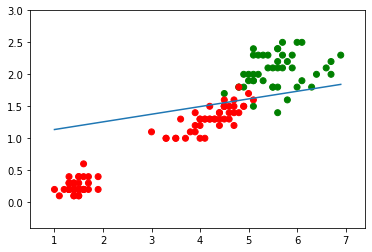

---Evaluation---
accuracy: 0.9333333333333333


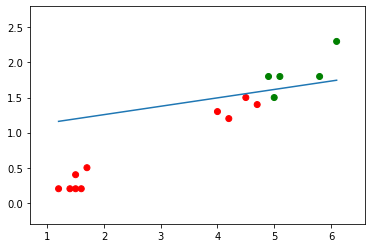

In [3]:
# 2クラス分類の例 (3クラス分類は面倒なので省略)

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(iris_train_petal_data, iris_train_vir_target)

w1, w2 = model.coef_
w0 = model.intercept_
print(f"f(x) = {w1} * x1 + {w2} * x2 + {w0}")

# 可視化
xlist = iris_train_petal_data[:,0]
ylist = iris_train_petal_data[:,1]
color = {1:"g", -1:"r"}
colors = [color[cls] for cls in iris_train_vir_target]
decision_surfaces = [-(w1 * x + w0) / w2 for x in sorted(xlist)]
plt.scatter(xlist, ylist, c=colors)
plt.plot(sorted(xlist), decision_surfaces)
plt.xlim((min(xlist) - 0.5, max(xlist) + 0.5))
plt.ylim((min(ylist) - 0.5, max(ylist) + 0.5))
plt.show()

# eval
print("---Evaluation---")
pred = model.predict(iris_test_petal_data)

pred[pred >= 0] = 1
pred[pred < 0] = -1
print(f"accuracy: {sum(pred==iris_test_vir_target) / len(iris_test_vir_target)}")

xlist = iris_test_petal_data[:,0]
ylist = iris_test_petal_data[:,1]
colors = [color[cls] for cls in iris_test_vir_target]
decision_surfaces = [-(w1 * x + w0) / w2 for x in sorted(xlist)]
plt.scatter(xlist, ylist, c=colors)
plt.plot(sorted(xlist), decision_surfaces)
plt.xlim((min(xlist) - 0.5, max(xlist) + 0.5))
plt.ylim((min(ylist) - 0.5, max(ylist) + 0.5))
plt.show()

##### ■過学習をふせぐ手法
+ Ridge: パラメータをL2ノルムで正則化 ($||y-Xw||^2_2 + \alpha ||w||^2_2$を最小化)
  + [sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)
+ Lasso: パラメータをL1ノルムで正則化 ($\frac{1}{2N} ||y-Xw||^2_2 + \alpha ||w||_1$
を最小化)
  + [sklearn.linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)

[解説](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a)

f(x) = -0.07586451354827757 * x1 + 1.1058525540948743 * x2 + -1.386582545803895


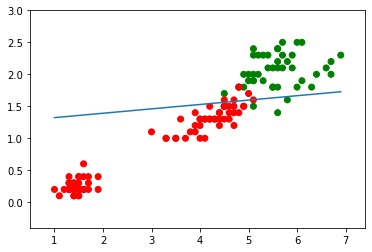

accuracy: 0.9333333333333333

f(x) = 0.3538228461412768 * x1 + 0.0 * x2 + -1.671307873741643


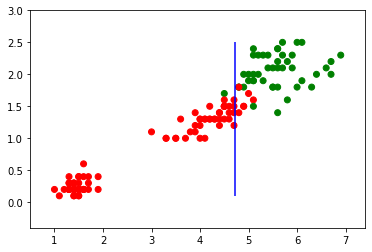

accuracy: 1.0



In [4]:
from sklearn.linear_model import Ridge, Lasso

for model in [Ridge(), Lasso(alpha=0.1)]:
  model.fit(iris_train_petal_data, iris_train_vir_target)

  w1, w2 = model.coef_
  w0 = model.intercept_
  print(f"f(x) = {w1} * x1 + {w2} * x2 + {w0}")

  # 可視化
  xlist = iris_train_petal_data[:,0]
  ylist = iris_train_petal_data[:,1]
  color = {1:"g", -1:"r"}
  colors = [color[cls] for cls in iris_train_vir_target]
  plt.scatter(xlist, ylist, c=colors)
  if w2 > 0:
    decision_surfaces = [-(w1 * x + w0) / w2 for x in sorted(xlist)]
    plt.plot(sorted(xlist), decision_surfaces)
  else:
    plt.vlines(-w0 / w1, min(ylist), max(ylist), colors="b")
  plt.xlim((min(xlist) - 0.5, max(xlist) + 0.5))
  plt.ylim((min(ylist) - 0.5, max(ylist) + 0.5))
  plt.show()

  pred = model.predict(iris_test_petal_data)
  pred[pred >= 0] = 1
  pred[pred < 0] = -1
  print(f"accuracy: {sum(pred==iris_test_vir_target) / len(iris_test_vir_target)}\n")

+ メリット
  + 解析的に解ける
+ デメリット
  + 線形識別可能な場合にしか適用できない

### LDA(Linear Discriminant Analysis, 線形判別分析)
データを1次元に写像したとき、同じクラス内では近く、違うクラス内では遠くなるように識別境界を決める。

解き方は「クラス間分散 / クラス内分散」の最大化。

[sklearn.discriminant_analysis.LinearDiscriminant](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)

[User Guide](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)

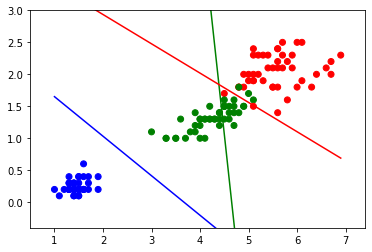

---Evaluation---
[0 1 1 2 1 0 1 2 1 0 0 2 0 2 0]
accuracy: 0.9333333333333333


In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

model = LDA()
model.fit(iris_train_petal_data, iris_train_target)

# 可視化
xlist = iris_train_petal_data[:,0]
ylist = iris_train_petal_data[:,1]
color = {0: "b", 1:"g", 2:"r"}
colors = [color[cls] for cls in iris_train_target]
plt.scatter(xlist, ylist, c=colors)
for i, ((w1, w2), w0) in enumerate(zip(model.coef_, model.intercept_)):
  decision_surfaces = [-(w1 * x + w0) / w2 for x in sorted(xlist)]
  plt.plot(sorted(xlist), decision_surfaces, color[i])
plt.xlim((min(xlist) - 0.5, max(xlist) + 0.5))
plt.ylim((min(ylist) - 0.5, max(ylist) + 0.5))
plt.show()

# eval
print("---Evaluation---")
pred = model.predict(iris_test_petal_data)
print(pred)
print(f"accuracy: {sum(pred==iris_test_target) / len(iris_test_target)}")


In [7]:
model = LDA()
model.fit(digits_train_data, digits_train_target)
pred = model.predict(digits_test_data)
print(f"accuracy: {sum(pred==digits_test_target) / len(digits_test_target)}")

accuracy: 0.9664804469273743


+ メリット
  + 解析的に解ける
  + クラス分類という目的に合致した解き方になっている
+ デメリット
  + 線形識別可能な場合にしか使えない
  + 次元圧縮として使う場合、クラス内ではデータを識別する情報が消える

### ロジスティック回帰
$f(x)=\frac{1}{1 + exp(-(w_0 + \boldsymbol{w} ^T \boldsymbol{x})}$ とおき関数区間を(0, 1)に制限し確率的に扱う。

最尤推定法で$\boldsymbol{w}$を求めるが、解析的には解けないのでニュートン法なので数値的に解を求める。

[sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

[User Guide](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

-2.6668515669540223 -1.1453083054815678 10.774208385001593
0.11871683593933922 -0.9089181525966348 3.06362246425446
2.5481347310146827 2.0542264580782077 -13.837830849255992


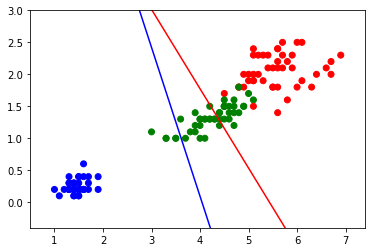

---Evaluation---
[0 1 1 2 1 0 1 2 1 0 0 2 0 2 0]
accuracy: 0.9333333333333333


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()  # デフォルトでL2ノルムによる正則化
model.fit(iris_train_petal_data, iris_train_target)

# 可視化
xlist = iris_train_petal_data[:,0]
ylist = iris_train_petal_data[:,1]
color = {0: "b", 1:"g", 2:"r"}
colors = [color[cls] for cls in iris_train_target]
plt.scatter(xlist, ylist, c=colors)
for i, ((w1, w2), w0) in enumerate(zip(model.coef_, model.intercept_)):
  print(w1, w2, w0)
  decision_surfaces = [-(w1 * x + w0) / w2 for x in sorted(xlist)]
  plt.plot(sorted(xlist), decision_surfaces, color[i])
plt.xlim((min(xlist) - 0.5, max(xlist) + 0.5))
plt.ylim((min(ylist) - 0.5, max(ylist) + 0.5))
plt.show()

# eval
print("---Evaluation---")
pred = model.predict(iris_test_petal_data)
print(pred)
print(f"accuracy: {sum(pred==iris_test_target) / len(iris_test_target)}")

In [9]:
model = LogisticRegression()
model.fit(digits_train_data, digits_train_target)
pred = model.predict(digits_test_data)
print(f"accuracy: {sum(pred==digits_test_target) / len(digits_test_target)}")

accuracy: 0.9720670391061452


/Users/fujino/.local/share/virtualenvs/sklean-trial-B-gOcSxw/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


+ メリット
  + 結果を確率的に扱える
+ デメリット
  + 線形識別可能な場合にしか使えない (入力ベクトルを非線形関数で変換してから適用する方法はある)